In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
fnames = ["adaECOLog.npz","OFULogr.npz", "OFULogPlus.npz"]
alg_names = ["ada-OFU-ECOLog", "OFULog-r", "OFULog+"]
colors = ['purple', 'green', 'red']

N = 5000
arm_set_type = 'tv_discrete'

tick_font_size = 24

0.9744750417272628
0.891022542956088
1.0282551038865122


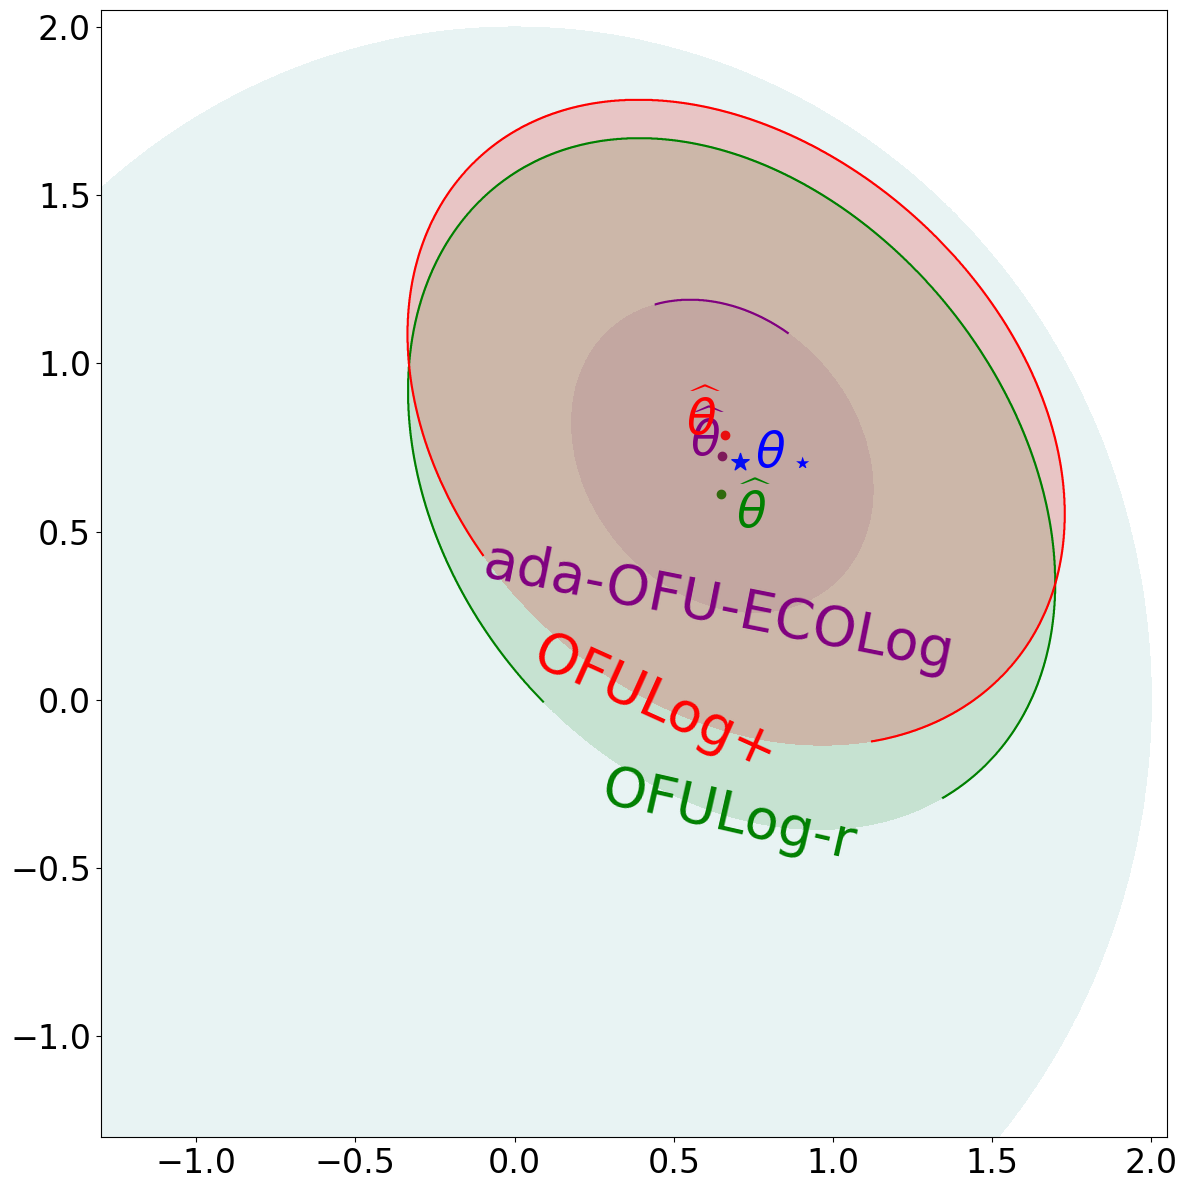

In [4]:
## S = 2
theta_star = np.array([1 / np.sqrt(2), 1 / np.sqrt(2)])

plt.figure(1, figsize=(12,12))
interact_rng = np.linspace(-2.5, 2.5, N)
x, y = np.meshgrid(interact_rng, interact_rng)

displacements = [(-0.15, 0), (0, -0.1), (-0.17, 0), (0.0, 0)]
manual_locations = [[(0.5, -0.3)], [(0.5, -1.0)], [(0.0, -1.0)]]   # label location for contourf
for i, fname in enumerate(fnames):
    fname = f"S=2/{arm_set_type}/{fname}"
    with np.load(fname) as data:
        z = data['z']
        # plt.imshow(z, extent=(x.min(), x.max(), y.min(), y.max()), origin="lower", cmap="Greys", alpha=0.5)
        CS = plt.contour(x, y, z, levels=[0,1], colors=colors[i])
        plt.clabel(CS, CS.levels[::2], inline=True, fmt=alg_names[i], fontsize=40, manual=manual_locations[i])
        plt.contourf(x, y, z, [1-1e-12,1+1e-12], colors=colors[i], alpha=0.1+i*0.05)
        
        theta_hat = data['theta_hat']
        print(np.linalg.norm(theta_hat))
        plt.scatter(theta_hat[0], theta_hat[1], color=colors[i])
        plt.annotate(r" $\widehat{\theta}$", theta_hat + displacements[i], color=colors[i], fontsize=35)
plt.scatter(theta_star[0], theta_star[1], color="blue", marker='*', s=170)
plt.annotate(r" $\theta_\star$", theta_star + displacements[-1], color='blue', fontsize=35)

z_ = (np.linalg.norm(np.array([x, y]), axis=0) <= 2).astype(int)
plt.contourf(x, y, z_, levels=[1-1e-12,1+1e-12], alpha=0.1)

plt.xlim([-1.3, 2.05])
plt.ylim([-1.3, 2.05])
plt.tick_params(axis='both', which='major', labelsize=tick_font_size)
plt.tick_params(axis='both', which='minor', labelsize=tick_font_size)
# plt.axis('off')
plt.tight_layout()
plt.savefig(f"S=2/{arm_set_type}/confidence_sets_S=2.png", dpi=300)
plt.savefig(f"S=2/{arm_set_type}/confidence_sets_S=2.pdf", dpi=300)
plt.show()

3.8098040177497094
3.3687650534081364
10.000000201752705


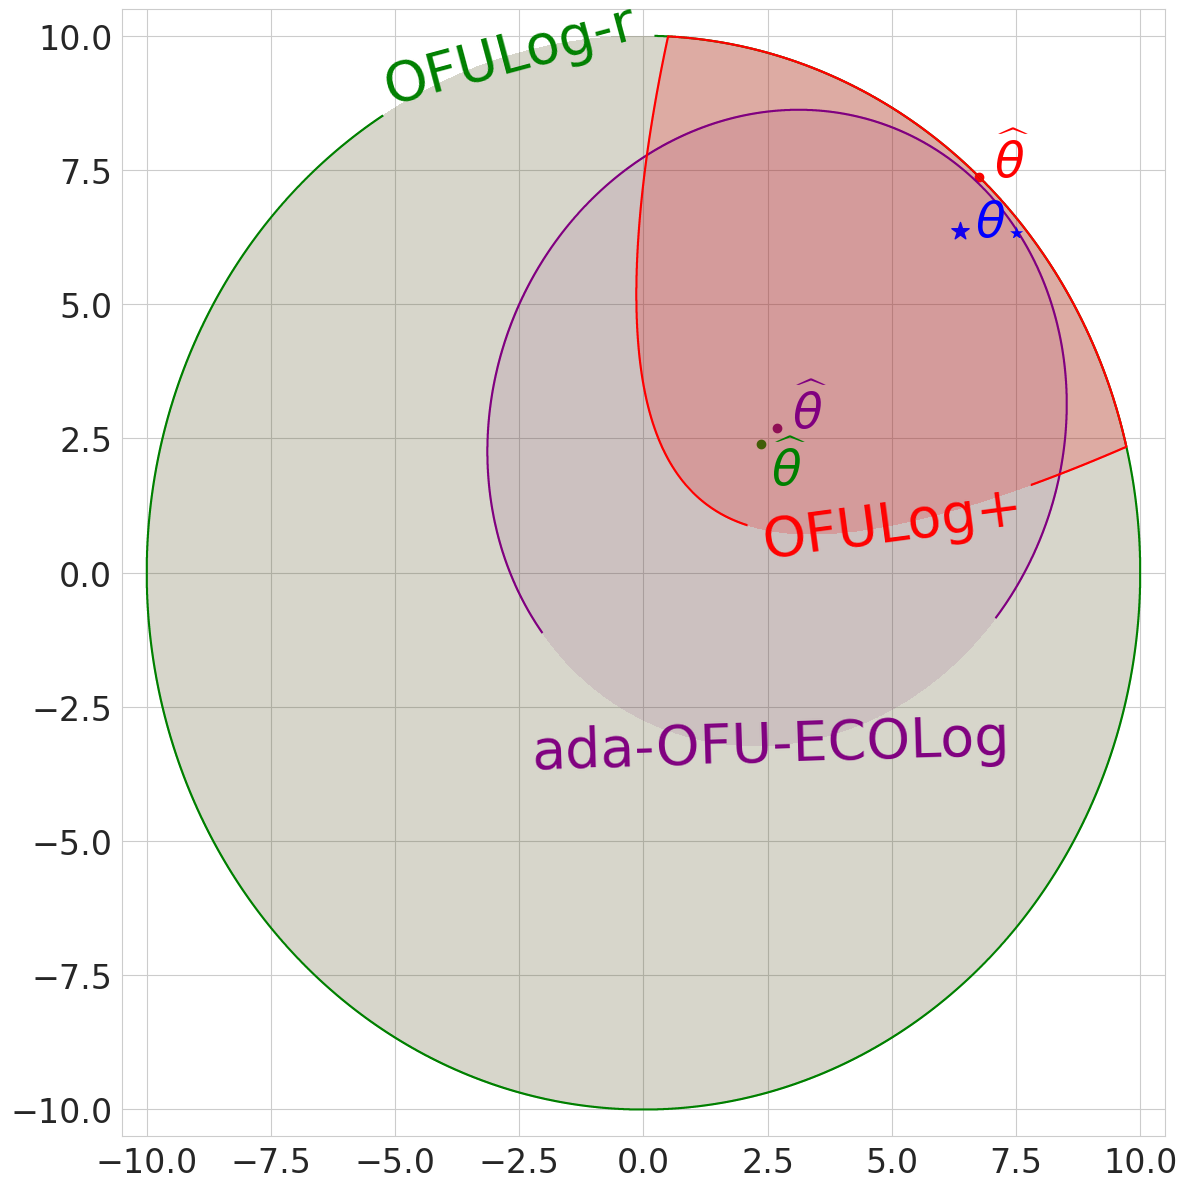

In [9]:
## S = 10
theta_star = np.array([9 / np.sqrt(2), 9 / np.sqrt(2)])

plt.figure(1, figsize=(12,12))
interact_rng = np.linspace(-10.5, 10.5, N)
x, y = np.meshgrid(interact_rng, interact_rng)

displacements = [(0, 0), (-0.1, -0.75), (0, 0.0), (0, 0.0)]
manual_locations = [[(2.5, -2.5)], [(-2.5, 9.0)], [(5.0, 1.0)]]   # label location for contourf
for i, fname in enumerate(fnames):
    fname = f"S=10/{arm_set_type}/{fname}"
    with np.load(fname) as data:
        z = data['z']
        # plt.imshow(z, extent=(x.min(), x.max(), y.min(), y.max()), origin="lower", cmap="Greys", alpha=0.5)
        CS = plt.contour(x, y, z, levels=[0,1], colors=colors[i])
        plt.clabel(CS, CS.levels[::2], inline=True, fmt=alg_names[i], fontsize=40, manual=manual_locations[i])
        plt.contourf(x, y, z, [1-1e-12,1+1e-12], colors=colors[i], alpha=0.1+i*0.05)
        
        theta_hat = data['theta_hat']
        print(np.linalg.norm(theta_hat))
        plt.scatter(theta_hat[0], theta_hat[1], color=colors[i])
        plt.annotate(r" $\widehat{\theta}$", theta_hat + displacements[i], color=colors[i], fontsize=35)
plt.scatter(theta_star[0], theta_star[1], color="blue", marker='*', s=170)
plt.annotate(r" $\theta_{\star}$", theta_star + displacements[-1], color='blue', fontsize=35)

z_ = (np.linalg.norm(np.array([x, y]), axis=0) <= 10).astype(int)
plt.contourf(x, y, z_, levels=[1-1e-12,1+1e-12], alpha=0.1)

plt.xlim([-10.5, 10.5])
plt.ylim([-10.5, 10.5])
plt.tick_params(axis='both', which='major', labelsize=tick_font_size)
plt.tick_params(axis='both', which='minor', labelsize=tick_font_size)
# plt.axis('off')
plt.tight_layout()
plt.savefig(f"S=10/{arm_set_type}/confidence_sets_S=10.png", dpi=300)
plt.savefig(f"S=10/{arm_set_type}/confidence_sets_S=10.pdf", dpi=300)
plt.show()